# Import

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Para generar datos
from sklearn import datasets 
# Importamos librerias de Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering
# Importamos silhouette_score
from sklearn.metrics import silhouette_score , rand_score
# from helpers import report_clustering_kmeans, report_clustering_hierarchical
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as py 
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics


## Dataset

In [2]:
df = pd.read_csv( 'vinos.csv')
df.head()

Vino  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     2    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     3    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     4    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     5    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

# EDA

## Define features 

In [10]:
df_X = df.drop('Vno',axis=1)
df_X

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 13 columns]

## info()

In [4]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


## describe()

In [5]:
df_X.describe()

Alcohol       Malic         Ash  Alcalinity   Magnesium     Phenols  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     11.030000    0.740000    1.360000   10.600000   70.000000    0.980000   
25%     12.362500    1.602500    2.210000   17.200000   88.000000    1.742500   
50%     13.050000    1.865000    2.360000   19.500000   98.000000    2.355000   
75%     13.677500    3.082500    2.557500   21.500000  107.000000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

       Flavanoids  Nonflavanoids  Proanthocyanins       Color         Hue  \
count  178.000000     178.000000       178.000000  178.000000  178.000000   
mean     2.029270       0.361854         1.590899    5.058090    0.957449   
std      0.998859       0.124453         0.572359    2.318286    0.228572   
min      0.340000       0.130000         0.410000    1.280000    0.480000   
25%      1.205000       0.270000         1.250000    3.220000    0.782500   
50%      2.135000       0.340000         1.555000    4.690000    0.965000   
75%      2.875000       0.437500         1.950000    6.200000    1.120000   
max      5.080000       0.660000         3.580000   13.000000    1.710000   

         Dilution      Proline  
count  178.000000   178.000000  
mean     2.611685   746.893258  
std      0.709990   314.907474  
min      1.270000   278.000000  
25%      1.937500   500.500000  
50%      2.780000   673.500000  
75%      3.170000   985.000000  
max      4.000000  1680.000000

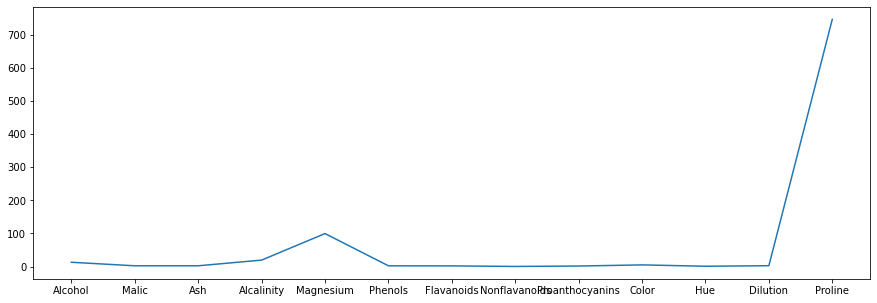

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df_X.describe().loc['mean'])

## Heatmap

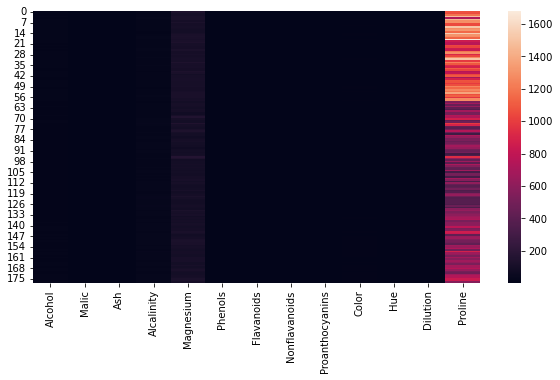

In [18]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(df_X, annot=False)

## Scaler

In [19]:
scaler = MinMaxScaler()

In [29]:
X = pd.DataFrame(scaler.fit_transform(df_X))

In [30]:
X.describe()

0           1           2           3           4           5   \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     0.518584    0.315484    0.538244    0.458502    0.323278    0.453487   
std      0.213639    0.220780    0.146708    0.172142    0.155244    0.215811   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.350658    0.170455    0.454545    0.340206    0.195652    0.262931   
50%      0.531579    0.222332    0.534759    0.458763    0.304348    0.474138   
75%      0.696711    0.462945    0.640374    0.561856    0.402174    0.627586   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9           10          11  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     0.356386    0.437460    0.372523    0.322363    0.388170    0.491460   
std      0.210730    0.234818    0.180555    0.197806    0.185831    0.260070   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.182489    0.264151    0.264984    0.165529    0.245935    0.244505   
50%      0.378692    0.396226    0.361199    0.290956    0.394309    0.553114   
75%      0.534810    0.580189    0.485804    0.419795    0.520325    0.695971   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               12  
count  178.000000  
mean     0.334446  
std      0.224613  
min      0.000000  
25%      0.158702  
50%      0.282097  
75%      0.504280  
max      1.000000

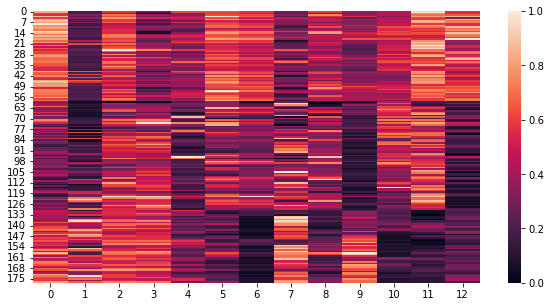

In [23]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(X_scal, annot=False)

## Correlation Matrix

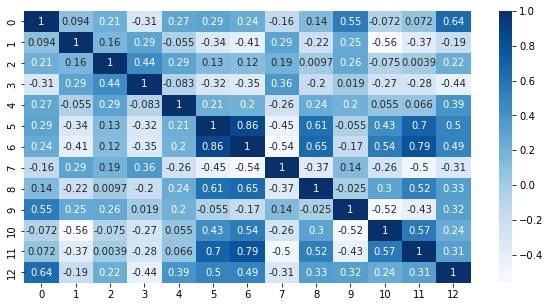

In [25]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(X_scal.corr(), annot=True, cmap='Blues')

## Pairplot

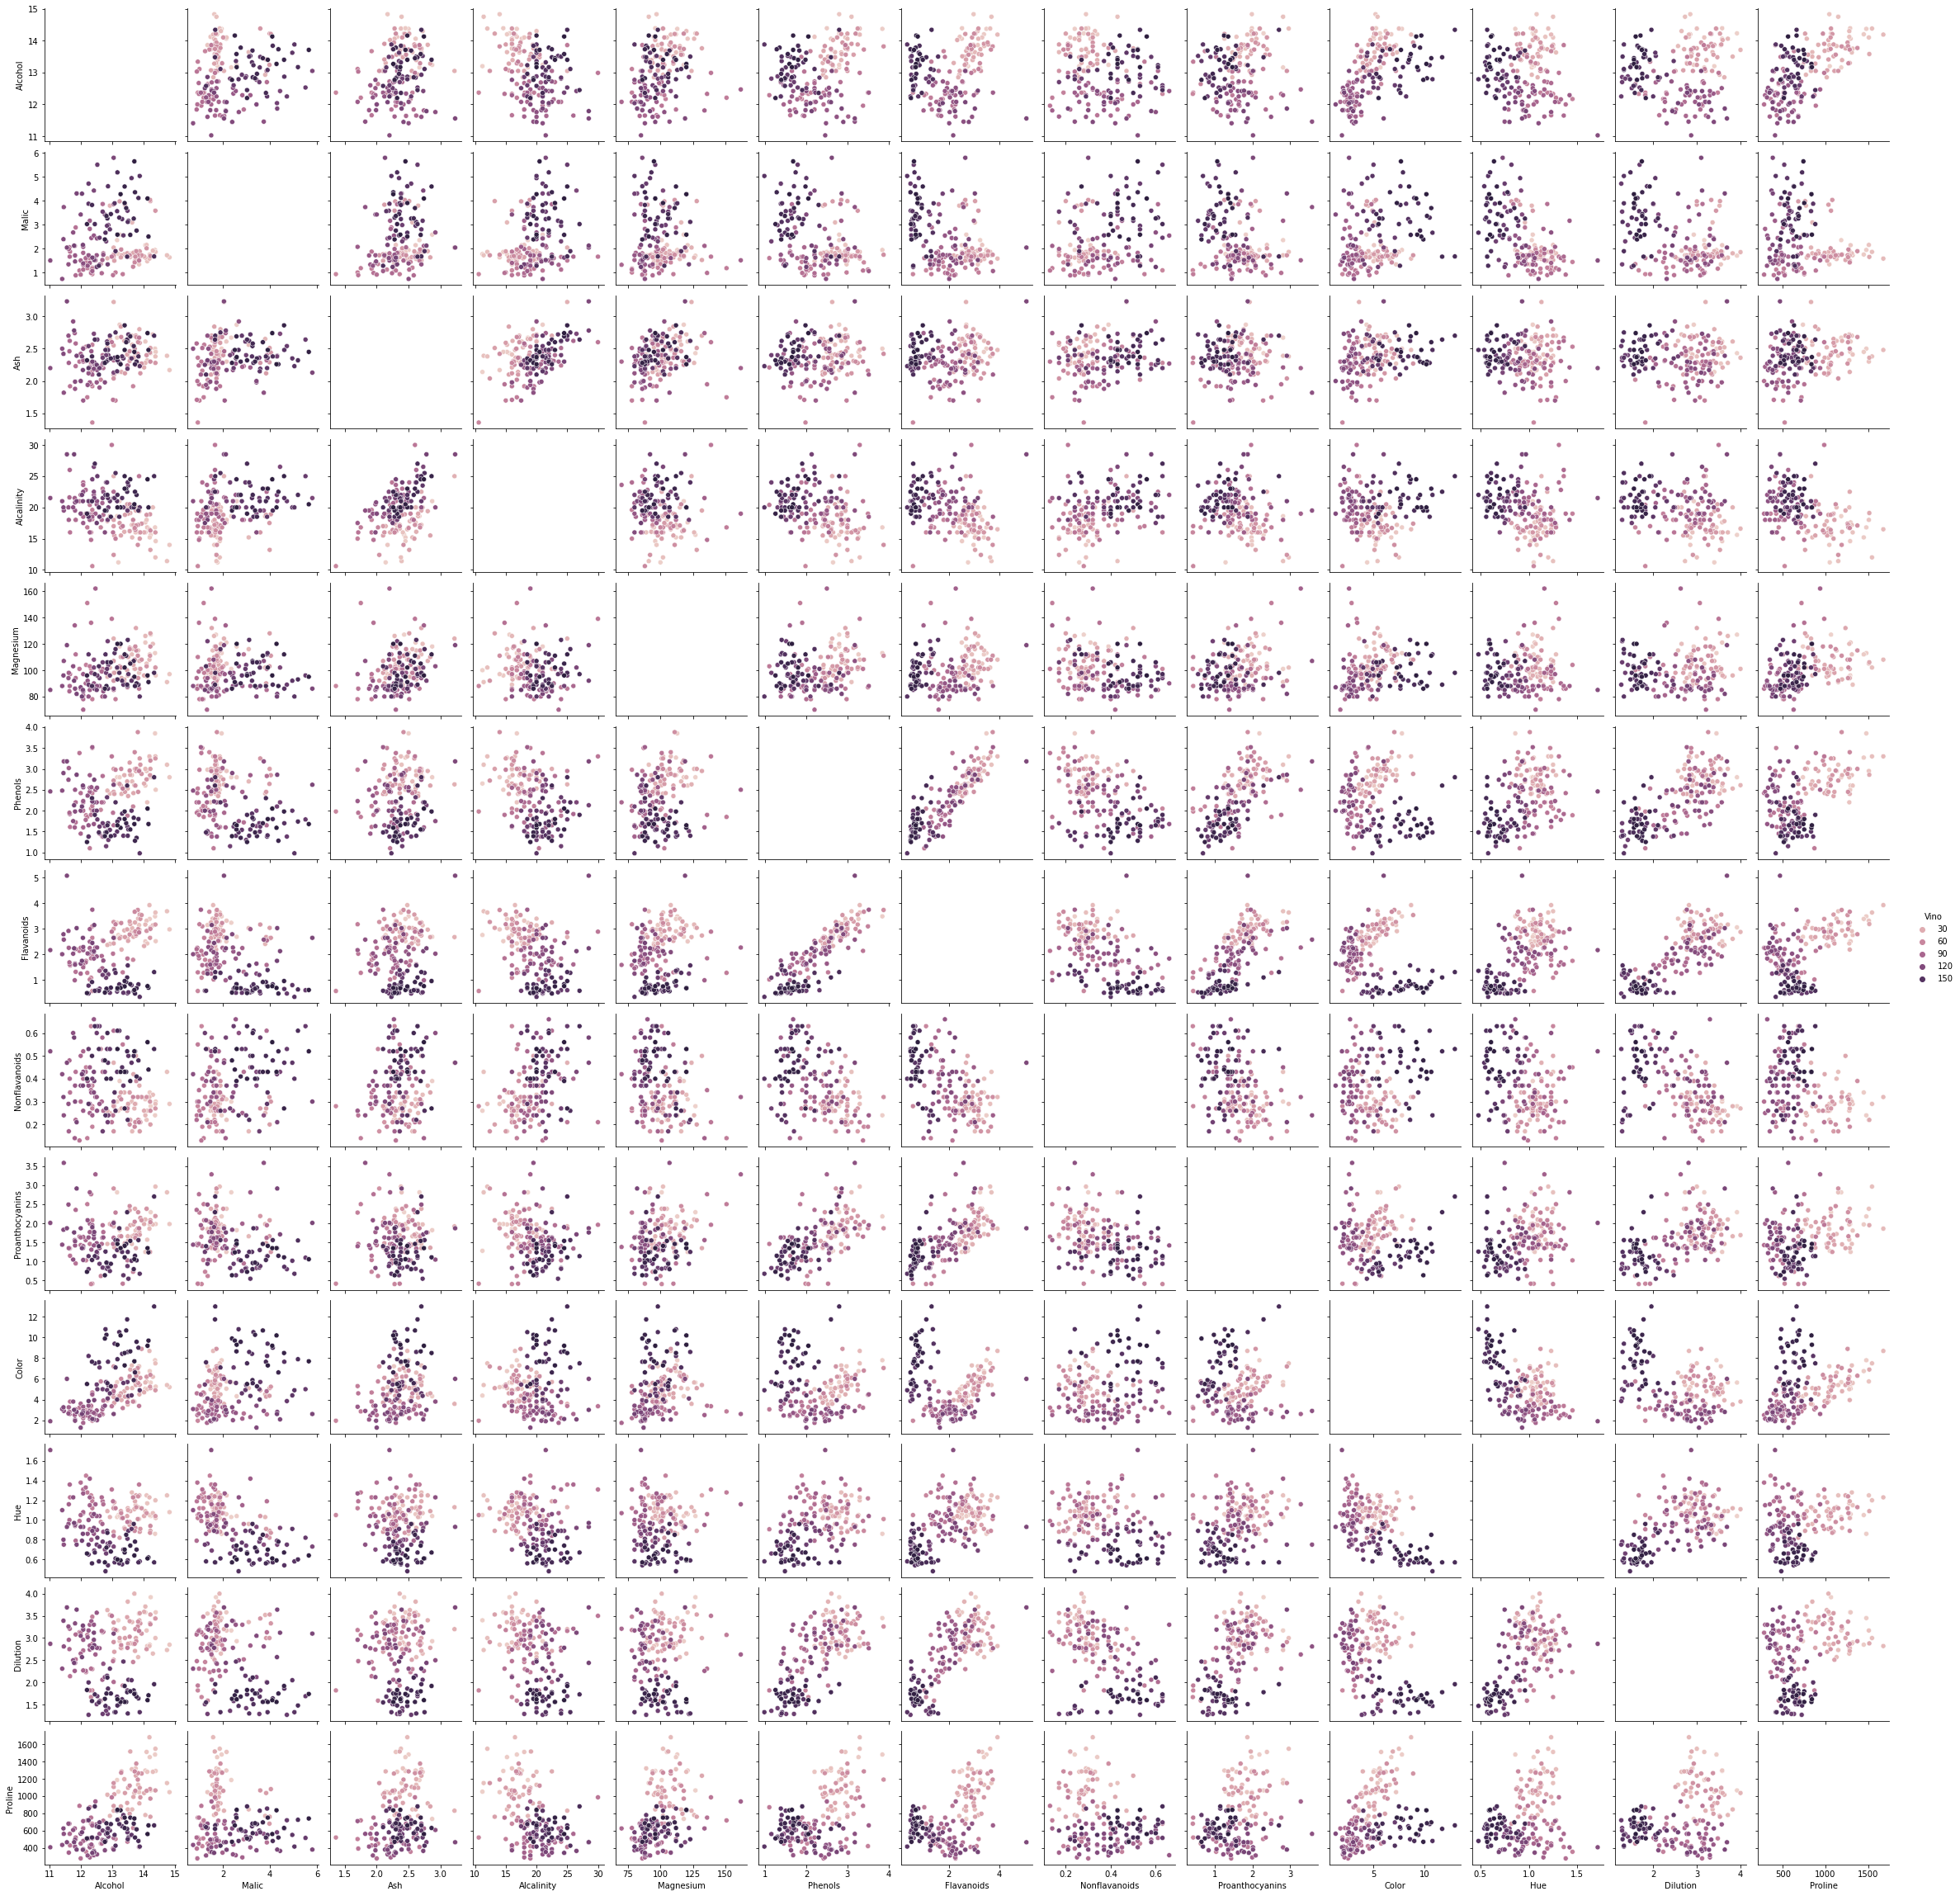

In [28]:
sns.pairplot(df,hue='Vino')

# KMeans

## KMeans train

In [37]:
# Metrics
dist_cent = []
sil_list = []
rand_list = []
  
for i,k in enumerate(range(2, 11)):
    # Creamos el objeto de clustering
    cluster = KMeans(n_clusters=k).fit(X)
    centers_i = cluster.cluster_centers_ # Centroide de cada cluster
    labels_i = cluster.labels_ # Labels de cada muestra
    # Silhouttte Score
    sil_score_i = silhouette_score(X,labels_i)
    sil_list.append(sil_score_i)       
    #inertia
    dist_cent.append(cluster.inertia_)

plt.show()

## Performance Metrics

### Elbow rule and Silhouette

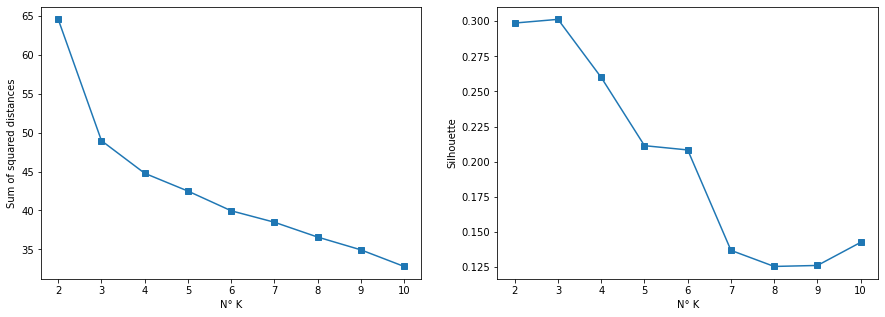

In [40]:
# Sum of squared distances
fig, axs = plt.subplots(1,2,figsize=(15,5))    
axs[0].plot(range(2, 11), dist_cent, marker='s');
axs[0].set_xlabel('N° K')
axs[0].set_ylabel('Sum of squared distances')
# Silhoute plot
axs[1].plot(range(2, 11), sil_list, marker='s');
axs[1].set_xlabel('N° K')
axs[1].set_ylabel('Silhouette')  
plt.show()

## Training model with 3 claster

In [43]:
clustering = KMeans(n_clusters=3, max_iter=300).fit(X)
clustering.fit(X)

KMeans(n_clusters=3)

In [46]:
X['class'] = clustering.labels_
X

0         1         2         3         4         5         6  \
0    0.842105  0.191700  0.572193  0.257732  0.619565  0.627586  0.573840   
1    0.571053  0.205534  0.417112  0.030928  0.326087  0.575862  0.510549   
2    0.560526  0.320158  0.700535  0.412371  0.336957  0.627586  0.611814   
3    0.878947  0.239130  0.609626  0.319588  0.467391  0.989655  0.664557   
4    0.581579  0.365613  0.807487  0.536082  0.521739  0.627586  0.495781   
..        ...       ...       ...       ...       ...       ...       ...   
173  0.705263  0.970356  0.582888  0.510309  0.271739  0.241379  0.056962   
174  0.623684  0.626482  0.598930  0.639175  0.347826  0.282759  0.086498   
175  0.589474  0.699605  0.481283  0.484536  0.543478  0.210345  0.073840   
176  0.563158  0.365613  0.540107  0.484536  0.543478  0.231034  0.071730   
177  0.815789  0.664032  0.737968  0.716495  0.282609  0.368966  0.088608   

            7         8         9        10        11        12  class  
0    0.283019  0.593060  0.372014  0.455285  0.970696  0.561341      1  
1    0.245283  0.274448  0.264505  0.463415  0.780220  0.550642      1  
2    0.320755  0.757098  0.375427  0.447154  0.695971  0.646933      1  
3    0.207547  0.558360  0.556314  0.308943  0.798535  0.857347      1  
4    0.490566  0.444795  0.259386  0.455285  0.608059  0.325963      1  
..        ...       ...       ...       ...       ...       ...    ...  
173  0.735849  0.205047  0.547782  0.130081  0.172161  0.329529      0  
174  0.566038  0.315457  0.513652  0.178862  0.106227  0.336662      0  
175  0.566038  0.296530  0.761092  0.089431  0.106227  0.397290      0  
176  0.754717  0.331230  0.684300  0.097561  0.128205  0.400856      0  
177  0.811321  0.296530  0.675768  0.105691  0.120879  0.201141      0  

[178 rows x 14 columns]

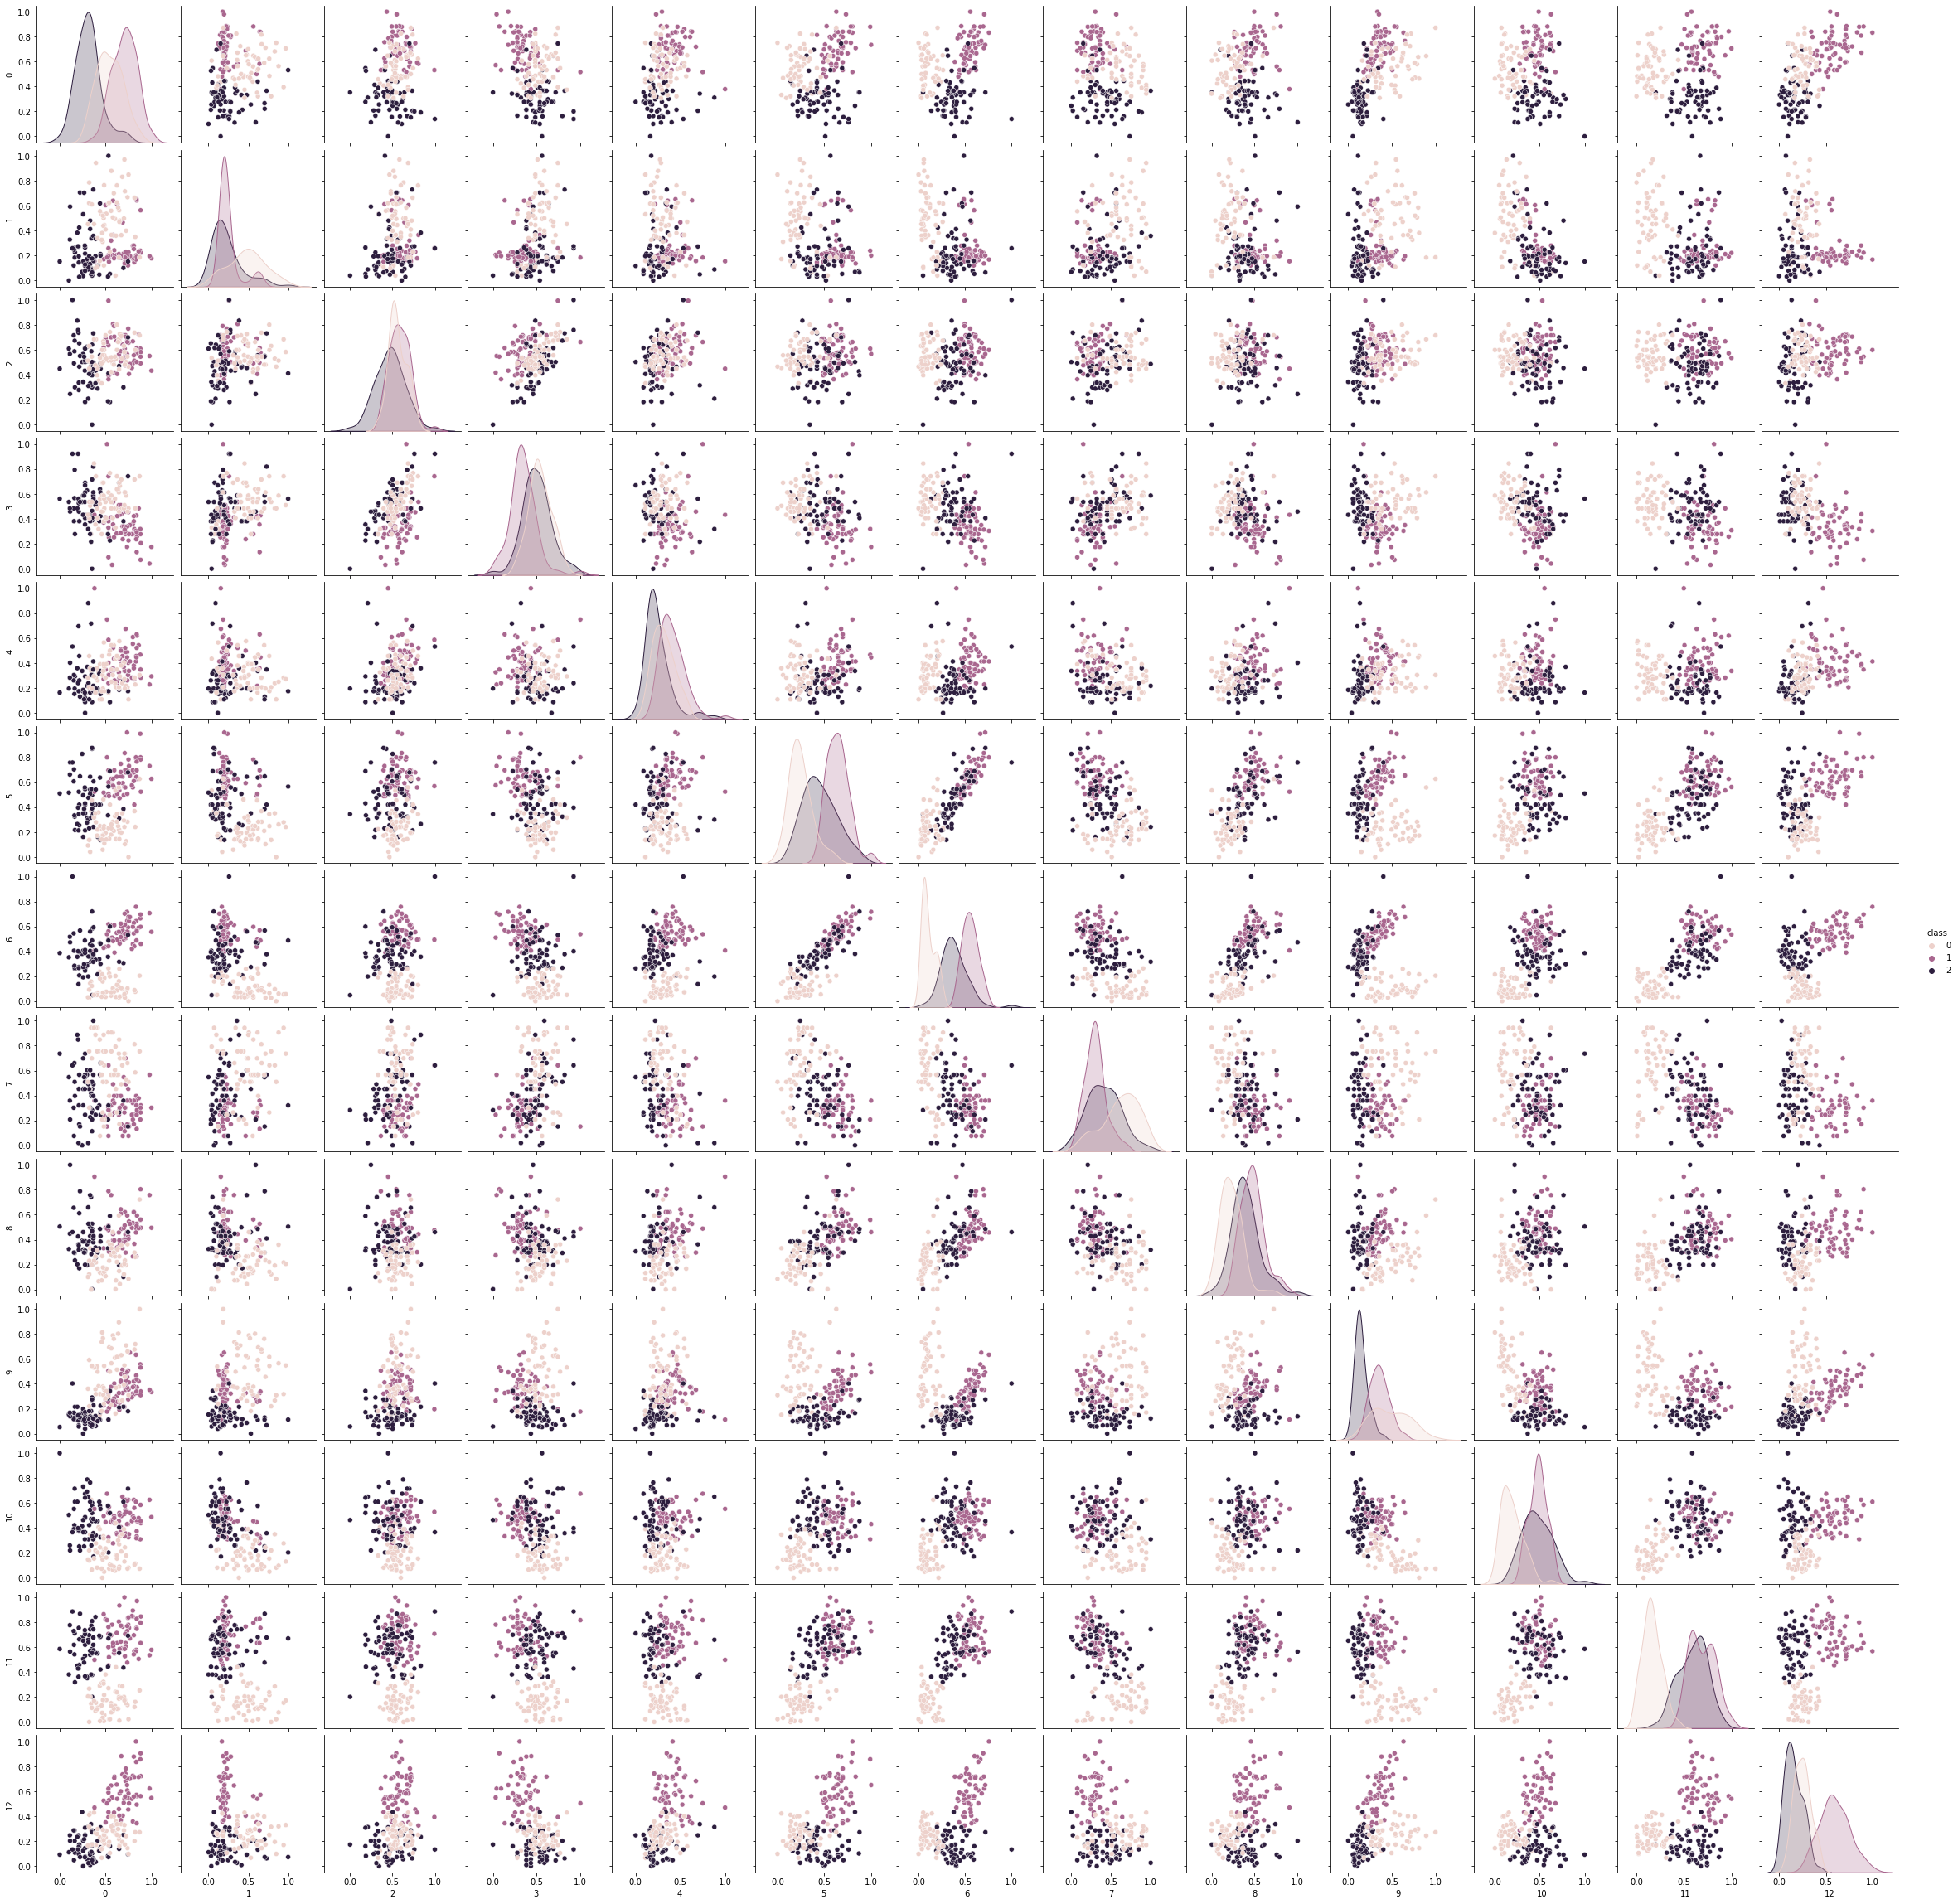

In [48]:
sns.pairplot(X, hue = 'class')